

# Project: Analysis of Tmdb movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

#### In this project, I will be using the TMDb Dataset from Kaggle.It includes the following features.
1. id
2. imdb_id
3. popularity
4. budget(assumption:interms of dollars)
5. revenue(assumption:interms of dollars)
6. original_title
7. cast
8. homepage
9. director
10. tagline
11. overview
12. runtime(assumption:interms of mins)
13. genre
14. production_companies
15. release_date
16. vote_count
17. vote_average
18. release_year
19. budget_adj
20. revenue_adj

#### Questions that I am going to analyse:

1. Does popularity have an effect on the revenue?
2. Most popular runtime among movies
3. On which range of years most films are released?
4. Is profit and release year relatable?
5. Which movie made a huge profit?
6. Which movie invested a high budget?
7. In which genre, most movies are filmed?
8. Number of films produced in each genre?
9. Which cast featured in most movies?


In [33]:
#import packages necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling



## General Properties:

In [34]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
#to view the top 5 rows in dataset
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




# Data Cleaning 

> Firstly, we shall observe the datastructure and understand the data inorder to proceed with the cleaning process
> Drop the unnecessary features that doesn't contribute to our analysis
> Discard the duplicates if any
> Drop the null values

In [35]:
# find the number of rows and columns
df.shape

(10866, 21)

In [36]:
# to find the max,min,std and mean
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [37]:
#to know the datatypes and any missing data present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [38]:
#to find number of unique features
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [39]:
#drop the unnecessary columns
delcell = ['budget_adj','revenue_adj','imdb_id','homepage','tagline','keywords','overview','production_companies','vote_average','release_date']
df = df.drop(delcell,axis = 1)


In [40]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,2015


In [41]:
#to find the total number of duplicates
sum(df.duplicated())

1

In [42]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

In [43]:
#Replacing zeros with nan
col = ['budget','revenue']
df[col]=df[col].replace(0,np.nan)


In [44]:
#dropping nas'
df.dropna(subset =col,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
vote_count        3854 non-null int64
release_year      3854 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 361.3+ KB


<a id='eda'></a>
# Exploratory Data Analysis

## Does popularity have an effect on the revenue?

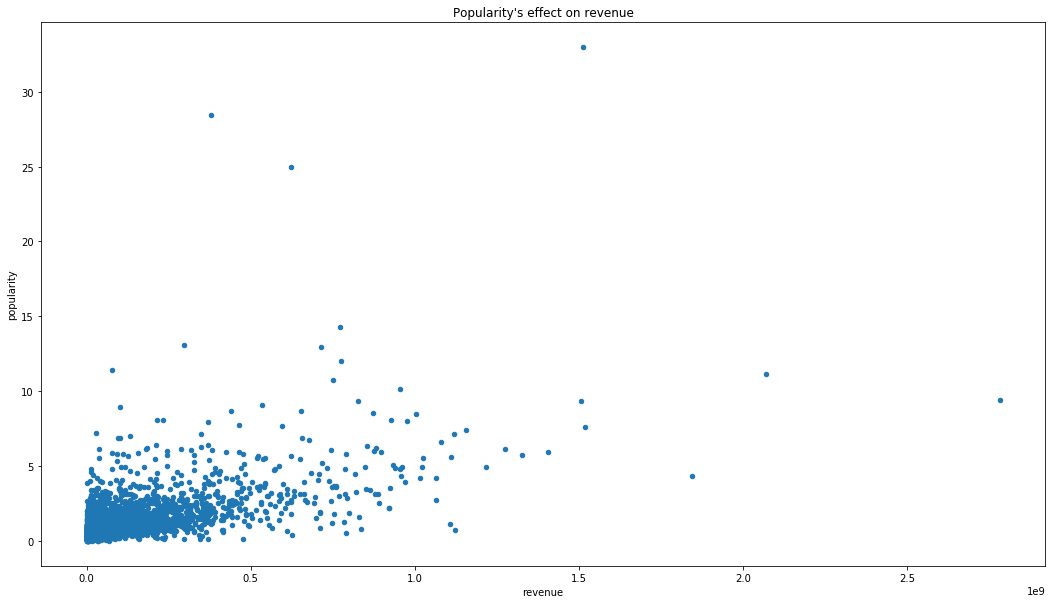

In [46]:
df.plot(x='revenue',y='popularity',title = 'Popularity\'s effect on revenue',kind = 'scatter',figsize=(18,10));

#### From the plot, it is inferred that more number of films fall under less popular category. Though there are some outliers, it can be seen that in few cases, revenue do increase with popularity.


In [47]:
#highest revenue
df['revenue'].idxmax()

1386

#### 1386th film has got highest revenue

# Most popular runtime among movies

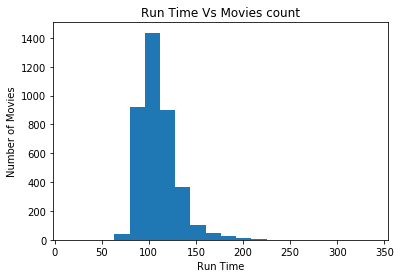

In [48]:
#runtime count
plt.xlabel('Run Time')
plt.ylabel('Number of Movies')
plt.title('Run Time Vs Movies count')
plt.hist(df['runtime'],bins = 20)
plt.show()

#### It can be seen from the graph that runtime is skewed to the right. Most films are produced in runtime between 80-120 mins.

In [49]:
#computing profit
x = df['revenue'] - df['budget']
#inserting it in the 4th column
df.insert(4,'profit',x)
df.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,2015


## On which range of years most films are released?

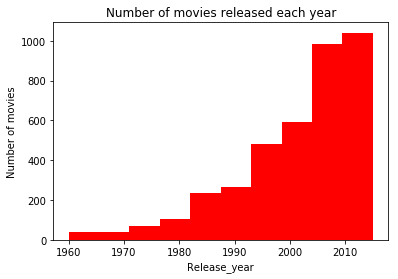

In [50]:
x = df['release_year']
plt.ylabel('Number of movies')
plt.xlabel('Release_year')
plt.title('Number of movies released each year')
plt.hist(x,color = 'r');

#### From the plot, it is found that more number of films are screened within the range(2009-2015). We can observe that there happened to be a drastic rise in the films after 2005.

## Is profit and release year are relatable?

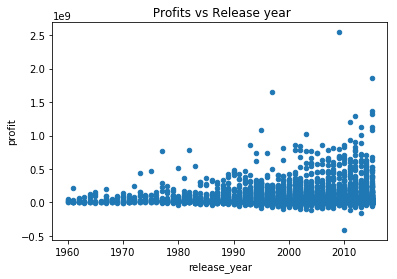

In [51]:
df.plot(x='release_year',y='profit',title = ' Profits vs Release year',kind='scatter');

#### It can be seen that profits increased with the release year. Movies released in recent years made good profit. From the graph, it can also be said, more number of people have become fond of movies as year growsby that the profit is evident.

In [52]:
df.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,2015


## Which movie made huge profit?

In [53]:
#Function to find the highest in the variables 
def func(variables):
    large = df[variables].idxmax()
    large_info = pd.DataFrame(df.loc[large])
    return large_info


In [54]:
#To get total info on the high profitable movie
func('profit')

,1386
id,19995
popularity,9.43277
budget,2.37e+08
revenue,2.78151e+09
profit,2.54451e+09
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction


## Which movie invested a high budget?

In [55]:
#finding the max budget and displaying it with the info
func('budget')

,2244
id,46528
popularity,0.25054
budget,4.25e+08
revenue,1.10876e+07
profit,-4.13912e+08
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller


## In which genre, most movies are filmed?
## Number of films produced in each genre?

In [56]:
#splitting the string and then making it a series
def fun(cols):
    fun = df[cols].str.cat(sep='|')
    fun = pd.Series(fun.split('|'))
#computing the count of variables
    fun_num = fun.value_counts()
    return fun_num
                              

In [57]:
#calling the function
fun_num = fun('genres')
fun_num

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

#### Most films are produced in drama genre. It seems that TV Movie, Foreign and Documentry genre hasn't been considered most for making films. More than 1000 films are produced in Drama,Comedy,Thriller and Action genre.

Text(0.5, 1.0, 'Number of Movies made in each genre')

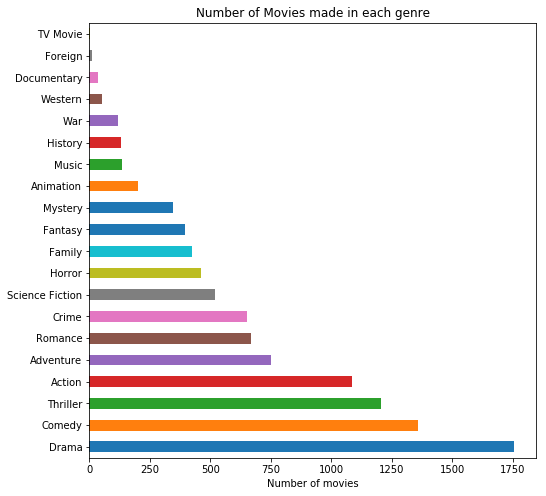

In [58]:
#plotting the genre with number of counts in bar
fig = fun_num.plot.barh(figsize=(8,8))
fig.set_xlabel('Number of movies')
fig.set_title('Number of Movies made in each genre')

## Which cast featured in most movies?

In [59]:
#calling the function to find the number of movies each cast featured.
fun('cast')


Robert De Niro           52
Bruce Willis             46
Samuel L. Jackson        44
Nicolas Cage             43
Matt Damon               36
Johnny Depp              35
Brad Pitt                34
Tom Hanks                34
Sylvester Stallone       34
Harrison Ford            34
Morgan Freeman           34
Tom Cruise               33
Denzel Washington        32
Eddie Murphy             32
Liam Neeson              31
Julianne Moore           30
Owen Wilson              30
Mark Wahlberg            29
Gene Hackman             29
Willem Dafoe             29
Meryl Streep             29
Arnold Schwarzenegger    29
Robin Williams           29
Dennis Quaid             28
Ben Affleck              28
Ewan McGregor            28
Cameron Diaz             28
Keanu Reeves             28
Jim Carrey               28
Nicole Kidman            27
                         ..
Ricky Jay                 1
Eddie Albert              1
Freddie Jones             1
Carolyn King              1
Maria Aitken        

#### Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage featured in minimum of 40 films       

<a id='conclusions'></a>
## Conclusions:

#### From the analysis of the data, I would like to conclude that
1. Revenue increases with popularity when seen on a broadscale with some outliers in it.
2. The runtime of most movies is between 70-120mins.
3. Most films are produced from late 2009's to 2015.
4. The movies released in 2015's produced good profit.
5. Avatar made huge profit and The Warrior's way invested high budget.
6. Most films are made in drama genre and comedy,thriller were also considered.
7. Robert De Niro ,Bruce Willis and Samuel L. Jackson appeared in most films.

### Limitations:
     The data provided is ambiguous that it consists of some missing values and few features do have null values       that lead me to drop those values. It doesn't clear imply the unit values for some of the features that I had         assumed it to be in dollars for revenue and budget.